In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams["font.size"] = 16

In [59]:

dir_ls1 = [
    "/home/nakao/AdaptiveFEM/work/work_5000_1/",
    "/home/nakao/AdaptiveFEM/work/work_5000_2/",
    "/home/nakao/AdaptiveFEM/work/work_5000_3/",
    "/home/nakao/AdaptiveFEM/work/work_5000_4/",
    "/home/nakao/AdaptiveFEM/work/work_5000_5/",
    "/home/nakao/AdaptiveFEM/work/work_5000_6/",
    "/home/nakao/AdaptiveFEM/work/work_5000_7/",
    "/home/nakao/AdaptiveFEM/work/work_5000_8/",
    "/home/nakao/AdaptiveFEM/work/work_5000_9/",
    "/home/nakao/AdaptiveFEM/work/work_5000_10/",
    "/home/nakao/AdaptiveFEM/work/work_5000_11/",
    "/home/nakao/AdaptiveFEM/work/work_5000_12/",
    "/home/nakao/AdaptiveFEM/work/work_5000_13/",
    "/home/nakao/AdaptiveFEM/work/work_5000_14/",
]
# dir_ls2 = [
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling1/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling2/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling3/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling4/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling5/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling6/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling7/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling8/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling9/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling10/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling11/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling12/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling13/",
#     "/home/nakao/AdaptiveFEM/work/work_5000_noscaling14/",
# ]
dir_ls3 = [
    "/home/nakao/AdaptiveFEM/work/work_2500_1/",
    "/home/nakao/AdaptiveFEM/work/work_2500_2/",
    "/home/nakao/AdaptiveFEM/work/work_2500_3/",
    "/home/nakao/AdaptiveFEM/work/work_2500_4/",
    "/home/nakao/AdaptiveFEM/work/work_2500_5/",
    "/home/nakao/AdaptiveFEM/work/work_2500_6/",
    "/home/nakao/AdaptiveFEM/work/work_2500_7/",
    "/home/nakao/AdaptiveFEM/work/work_2500_8/",
    "/home/nakao/AdaptiveFEM/work/work_2500_9/",
    "/home/nakao/AdaptiveFEM/work/work_2500_10/",
]
# dir_ls4 = [
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling1/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling2/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling3/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling4/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling5/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling6/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling7/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling8/",
#     "/home/nakao/AdaptiveFEM/work/work_2500_noscaling9/",
# ]
label_ls = [
    "initial element size 5km",
    # "initial element size 5km no scaling",
    "initial element size 2.5km",
    # "initial element size 2.5km no scaling",
]
# dir_ls_arr = [dir_ls1, dir_ls2, dir_ls3, dir_ls4]
dir_ls_arr = [dir_ls1, dir_ls3]
# dir_ls_arr = [dir_ls2, dir_ls3, dir_ls4]

filename = dir_ls1[0] + "data/obs_points.dat"
with open(filename, "r") as f:
    f.readline()
    line = f.readline()
    obs_points = np.zeros((int(line), 3))
    f.readline()
    for i in range(int(line)):
        line = f.readline()
        obs_points[i] = [float(x) for x in line.split()]

1.870509948347473e-15
1.1954748554109121e-15
8.36353664102068e-16
4.1040211062098444e-16
2.218922808185391e-16
1.181307031585014e-16
6.224851975767641e-17
2.9051575100270826e-17
1.4607629193971103e-17
7.590285711732804e-18
3.678099968088557e-18
1.8443032828787906e-18
9.224385245844463e-19
-----
9.920553394124884e-16
6.488815257882473e-16
3.6067828823799687e-16
2.0461281272213635e-16
1.1044849645313031e-16
5.5504369703899214e-17
3.876340633564055e-17
1.4330985094973058e-17
7.33771261429814e-18
-----


Text(0, 0.5, 'norm of displacement difference')

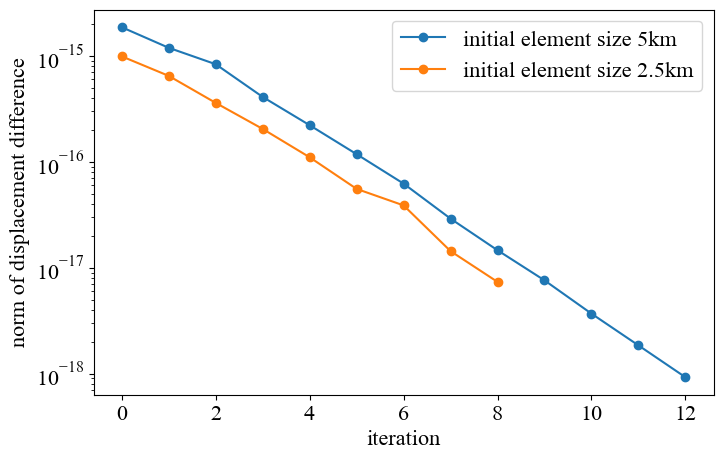

In [60]:
nload = 51
nobs = 1100
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros((nload, nobs*3))
    uobs_prev = np.zeros((nload, nobs*3))

    for iload in range(nload):
        filename = dir_ls[0] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
        uobs_prev[iload] = np.fromfile(filename, dtype=np.float64)
    for i in range(1, len(dir_ls)):
        for iload in range(nload):
            filename = dir_ls[i] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
            uobs[iload] = np.fromfile(filename, dtype=np.float64)
        delta = np.linalg.norm(uobs - uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("norm of displacement difference")

In [61]:
nobs

1100

observed point:  [120000. 110000. 240000.]
1.0553576587983918e-17
1.008371453079473e-17
9.617470891571748e-18
9.196560993890545e-18
8.88949618111287e-18
8.698826293248817e-18
8.590830987178204e-18
8.533120997439598e-18
8.503167553617507e-18
8.487917305575658e-18
8.48022547291487e-18
8.476359218615966e-18
8.474422968606682e-18
8.473453019691064e-18
-----
1.010736153830746e-17
9.643923588545389e-18
9.233402539457353e-18
8.939733914426245e-18
8.757253274387233e-18
8.654390822078611e-18
8.59939779932288e-18
8.571121076534628e-18
8.556826866617606e-18
8.549618190650027e-18
-----


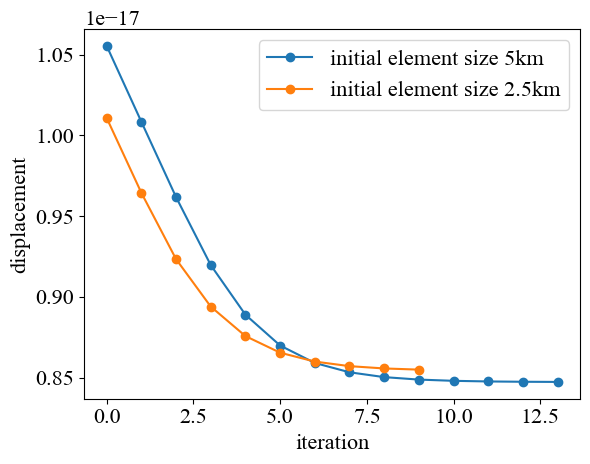

In [62]:
uindex = 1100*3-1
print("observed point: ", obs_points[uindex//3])
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs = np.zeros(nobs*3)
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "displacement/0001_obs.bin"
        tmp = np.fromfile(filename, dtype=np.float64)
        uobs[:tmp.shape[0]] = tmp
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()

536701
569171
676740
741679
922191
1393109
2302960
3520146
4136844
5047854
6695826
7316194
9362796
10497917
-----
4091291
4127395
4217529
4477751
4536045
4946877
5209523
7193943
7918781
10002398
-----


Text(0, 0.5, 'number of nodes')

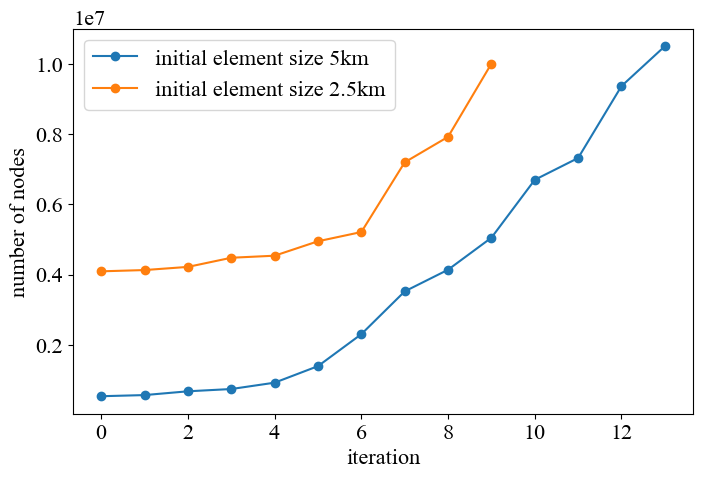

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    nnode_plt = []
    for dir in dir_ls:
        filename = dir + "data/setting.dat"
        with open(filename, "r") as f:
            f.readline()
            nnode = int(f.readline())
            print(nnode)
            nnode_plt.append(nnode) 
    ax.plot(nnode_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.legend(loc='best')
ax.set_xlabel("iteration")
ax.set_ylabel("number of nodes")

0.0011471950132373452
0.0015300307979233955
0.00035717395454319423
0.0002702901956824456
0.00018306074489438212
0.00013399018043517907
0.00011842437828188958
2.7600179589856773e-05
1.4200153158380348e-05
7.334044983110839e-06
3.641578296885132e-06
1.8031584312926395e-06
9.045029327446681e-07
-----
0.00037417776075095806
0.00034816804702884804
0.0002588105696381156
0.00016941373638972859
9.64767004643826e-05
5.2760251715856746e-05
6.019236884447841e-05
1.4056335517678601e-05
7.17202025804394e-06
-----


Text(0, 0.5, 'norm of displacement difference')

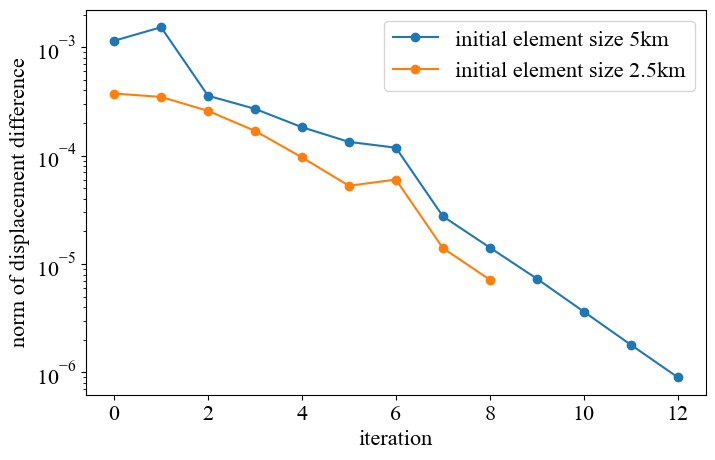

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros(nload)
    uobs_prev = np.loadtxt(dir_ls[0] + "data/greens_function.dat")

    for i in range(1, len(dir_ls)):
        uobs = np.loadtxt(dir_ls[i] + "data/greens_function.dat")
        delta = np.linalg.norm(uobs - uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("norm of displacement difference")

0.01219494547595006
0.01217415994738127
0.01214936119513631
0.01200935044053259
0.01189673541593847
0.01182674948797024
0.01178384484879417
0.01174793657354498
0.01173538817322689
0.01172887609815038
0.0117254344977384
0.01172379906912713
0.01172298921553038
0.01172257130879662
-----
0.01250142972197479
0.01239364763251853
0.01226521438982231
0.01215700601426059
0.01208349193436654
0.0120402308754066
0.01201629901149424
0.01200346224214162
0.01199710886688459
0.01199396337586922
-----


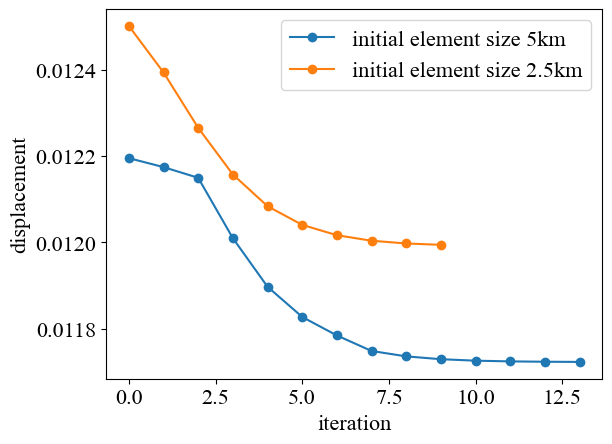

In [65]:
uindex = 30
# print("observed point: ", obs_points[uindex//3])
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs = np.zeros(nload)
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "data/greens_function.dat"
        uobs = np.loadtxt(filename)
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()